I was having problem loading keras on pc, hence the following part was computed on google colab

In [1]:
#linking notebook to Google Drive folder where the data is uploaded
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import glob

#loading folders from google drive, containing Jersey and Shirt images
jersey = glob.glob("gdrive/My Drive/Colab Notebooks/Jersey - n03595614/*")
shirt = glob.glob("gdrive/My Drive/Colab Notebooks/Shirt - n04197391/*")
print(len(jersey), len(shirt))

1332 1470


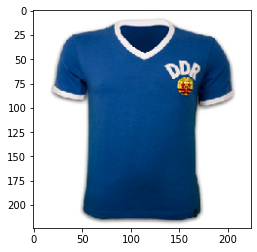

In [3]:
import matplotlib.pyplot as plt
from keras.preprocessing import image
from matplotlib.pyplot import imshow

img_path = jersey[5] #selecting a random jersey image to view
img = image.load_img(img_path, target_size=(224, 224)) #loading and resizing
x = image.img_to_array(img) #converting to array
x = x.reshape((1,) + x.shape)
plt.imshow(image.array_to_img(x[0])) #plotting

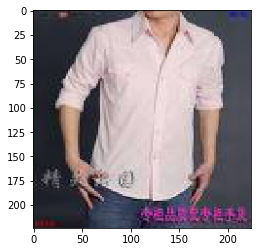

In [4]:
img_path = shirt[14] #selecting a random shirt image to view
img = image.load_img(img_path, target_size=(224, 224)) #loading and resizing
x = image.img_to_array(img) #converting to array
x = x.reshape((1,) + x.shape)
plt.imshow(image.array_to_img(x[0])) #plotting

In [5]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58892288/58889256 [==============================] - 0s 0us/step


In [9]:
from keras.applications.vgg16 import preprocess_input
from datetime import datetime  
import numpy as np

startTime = datetime.now() 

jerseyFeatures, shirtFeatures = [], []

for i in jersey:
    img = image.load_img(i, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = conv_base.predict(x)
    jerseyFeatures.append(features)

for i in shirt:
    img = image.load_img(i, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = conv_base.predict(x)
    shirtFeatures.append(features)

timeElapsed = datetime.now() - startTime  
print('Time elpased (hh:mm:ss.ms) {}'.format(timeElapsed))

Time elpased (hh:mm:ss.ms) 0:38:00.055629


In [11]:
from sklearn.model_selection import train_test_split

jerseyFeatures = np.asarray(jerseyFeatures)
jerseyFeatures = jerseyFeatures.reshape(len(jersey), 7, 7, 512)

shirtFeatures = np.asarray(shirtFeatures)
shirtFeatures = shirtFeatures.reshape(len(shirt), 7, 7, 512)

X = np.append(jerseyFeatures, shirtFeatures, axis = 0)
y = np.append(np.ones(len(jersey)), np.zeros(len(shirt)), axis = 0) #labelling classes, shirt:0, jersey:1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #splitting dataset into training and test sets

In [12]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Flatten(input_shape=(7,7,512)))
model.add(layers.Dense(256, activation='relu', input_dim=(7*7*512)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
#compiling model
model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy', metrics=['acc'])

Loss function: Binary cross-entropy because we are implementing two label classifications

In [14]:
#training model
startTime = datetime.now() 
history = model.fit(X_train, y_train, epochs=30, validation_data = (X_test, y_test))
timeElapsed = datetime.now() - startTime  
print('Time elpased (hh:mm:ss.ms) {}'.format(timeElapsed))

Epoch 1/30
71/71 [==============================] - 3s 42ms/step - loss: 5.0974 - acc: 0.6394 - val_loss: 0.5588 - val_acc: 0.7380
Epoch 2/30
71/71 [==============================] - 3s 41ms/step - loss: 0.5567 - acc: 0.7854 - val_loss: 0.5446 - val_acc: 0.7594
Epoch 3/30
71/71 [==============================] - 3s 41ms/step - loss: 0.4865 - acc: 0.7889 - val_loss: 0.5284 - val_acc: 0.7558
Epoch 4/30
71/71 [==============================] - 3s 40ms/step - loss: 0.4498 - acc: 0.8108 - val_loss: 0.5080 - val_acc: 0.7576
Epoch 5/30
71/71 [==============================] - 3s 41ms/step - loss: 0.3954 - acc: 0.8246 - val_loss: 0.5090 - val_acc: 0.7665
Epoch 6/30
71/71 [==============================] - 3s 41ms/step - loss: 0.4079 - acc: 0.8237 - val_loss: 0.5084 - val_acc: 0.7558
Epoch 7/30
71/71 [==============================] - 3s 41ms/step - loss: 0.3372 - acc: 0.8380 - val_loss: 0.5520 - val_acc: 0.7522
Epoch 8/30
71/71 [==============================] - 3s 41ms/step - loss: 0.3357 - a

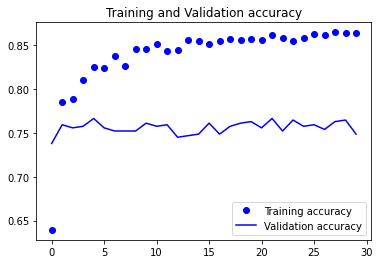

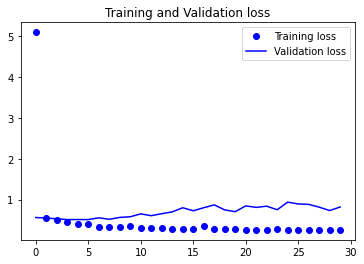

In [16]:
# plotting 
# ref: https://medium.com/@manasnarkar/transfer-learning-getting-started-9cebf5855a08
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

Final Accuracy Results
- Support Vector Machines, Kernels:
    - Linear 
        - Train:  0.978; 
        - Test:  0.556
    - Poly, degree = 2
        - Train: 0.978
        - Test: 0.567
    - RBF
        - Train: 0.978
        - Test: 0.485

- Deep Neural Networks:
    - VGG16
        - Train: ~ 0.85
        - Validation: ~ 0.75

SVC classifier test data results are as useful as (almost) flipping a coin to predict whether given is a jersey or a shirt. They seem to be overfitting as they performing well only on training set.
VGG16 CNN gives us much better results with ~ 75% accuracy on validation set. This could improve with more images to train. Earlier, I had tried with only a couple hundred images and the accuracy was around 50% but it improved when I loaded all the images although it took 40 minutes for feature extraction.